# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from one hundred thousand medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The following are the data types available in this dataset.
- 'PatientId' includes the IDs of the patients. 
- 'AppointmentID' shows the appointment IDs for each patient.
- 'Gender' indicates the gender of each patient.
- ‘ScheduledDay’ tells us on what day and time the patient showed up to their appointment.
- 'AppointmentDay' tells us on what day and time the patient set up their appointment.
- 'Age' indicates the patient's age.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- 'Hipertension' concludes whether the patient had said condition or not.
- 'Diabetes' concludes whether the patient had said condition or not.
- 'Alcoholism' concludes whether the patient had said condition or not.
- 'Handcap' concludes whether the patient is handicapped or not.
- 'SMS_received' indicates whether one or more messages have been sent to the patient or not.
- 'No-show' indicates whether the patient was a no-show or not.

### Questions for Analysis
The following questions will be the focus of this report.
1. Does age have any correlation with no-show patients?
2. Does gender have any correlation with no-show patients?
3. Do no-show patients have more diagnosed conditions than patients that do show up? 

In [1]:
# Import statements + magic function to show plots inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties
The following few code cells preivew the raw dataset pre-cleaning as well as a few properties such as any null values.

In [2]:
# Loading the csv file with the data and assigning it to a variable
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head() # to show a preview of the dataset pre-cleaning

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Size of the dataframe pre-cleaning
df.shape

(110527, 14)

In [4]:
# Checking if there are any null values in any of the columns
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

As can be seen above, this dataset does not have any null values thankfully.
<br>Below will be a test to see whether there are duplicates in this dataset or not.

In [5]:
df.duplicated().sum()

0

Thankfully, there are no duplicates in this dataset as well. The focus shall be shifted towards the main data cleaning matters.


### Data Cleaning
As shown above, the data does not have any null values nor any duplicated rows.
<br>Not all of the data provided is necessary for this report. In order to maintain a clean dataframe for this report, the following columns will be dropped from it accompanied by the reason to why this will be done.
- 'PatientId' as this is too personalised and is not meaningful for analysis.
- 'AppointmentID' as this is too personalised and is not meaningful for analysis.
- 'ScheduledDay' as this is not necessary for this analysis.
- 'AppointmentDay' as this is not necessary for this analysis.
- 'Neighbourhood' as this is not necessary for this analysis.
- 'Scholarship' as this is not necessary for this analysis.
- 'SMS_received' as this is not necessary for this analysis.

<br>Below is the process of dropping the aforementioned columns.

In [6]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Scholarship', 'SMS_received'], axis=1, inplace=True)

In [7]:
# Previewing the data
df.head()

,Gender,Age,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,62,1,0,0,0,No
1,M,56,0,0,0,0,No
2,F,62,0,0,0,0,No
3,F,8,0,0,0,0,No
4,F,56,1,1,0,0,No


As can be seen, the labels of the columns are not all formatted properly.
<br>Below are the steps made to format them accordingly.

In [8]:
# Changing the labels to lowercase
df.columns = df.columns.str.lower()

# Changing the dash in no-show to an underscore as well as fixing the spelling error in hipertension
df.rename(columns = {'no-show': 'no_show', 'hipertension': 'hypertension'}, inplace=True)

Data types can be very wrong in some dataframes. Below is a code to check whether all of the data types are correct or not.

In [9]:
df.dtypes

gender          object
age              int64
hypertension     int64
diabetes         int64
alcoholism       int64
handcap          int64
no_show         object
dtype: object

Thankfully, all of the data types are as they should be.
<br>Here is a preview of the cleaned data as well as its size post-cleaning.

In [10]:
df.head()

,gender,age,hypertension,diabetes,alcoholism,handcap,no_show
0,F,62,1,0,0,0,No
1,M,56,0,0,0,0,No
2,F,62,0,0,0,0,No
3,F,8,0,0,0,0,No
4,F,56,1,1,0,0,No


In [11]:
df.shape

(110527, 7)

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 - Does age have any correlation with no-show patients?
<br>Below is the proccess of the creation of the plot that will answer this question.

In [12]:
# Finding the median age
med_age = df['age'].median()

# Creating variables for patients below and above median age that did not show up
b_med = df[df['age'] < med_age]['no_show'][df['no_show'] == 'Yes'].value_counts()[0]
a_med = df[df['age'] > med_age]['no_show'][df['no_show'] == 'Yes'].value_counts()[0]

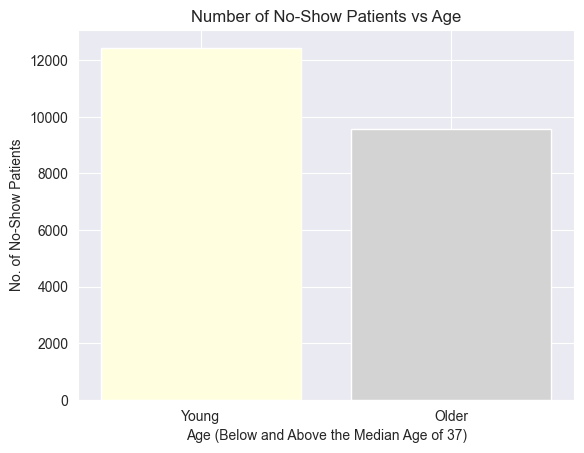

In [13]:
# Defining variables for plotting
locs = [1,2]
heights = [b_med, a_med]
labels = ['Young', 'Older']

# Plotting the bar chart
sns.set_style("darkgrid")
plt.bar(locs, heights, tick_label=labels, color=['lightyellow', 'lightgrey']);
plt.xlabel('Age (Below and Above the Median Age of {})'.format(int(med_age)));
plt.ylabel('No. of No-Show Patients');
plt.title('Number of No-Show Patients vs Age');

Based on this database, it can be concluded that younger people tend to miss their appointments more than older people.
<br>Below is a histogram that shows the age spread of the patients for reference.

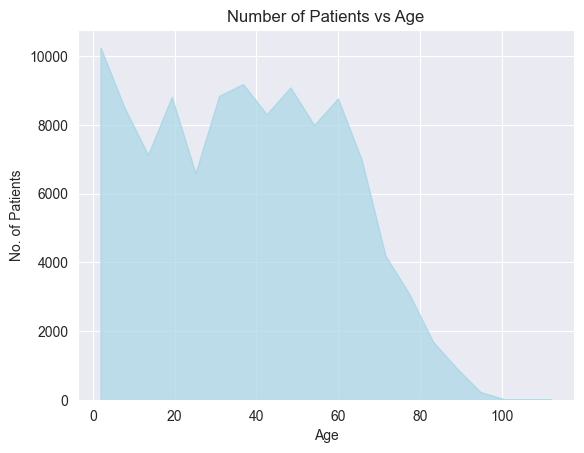

In [14]:
# Using seaborn library to plot
sns.histplot(data=df, x='age', bins=20, element="poly", color='lightblue')
plt.xlabel('Age');
plt.ylabel('No. of Patients');
plt.title('Number of Patients vs Age');

It can be concluded that there are many more younger patients than older patients.

### Research Question 2 - Does gender have any correlation with no-show patients?
<br>Below is the proccess of the creation of the plot that will answer this question.

In [15]:
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In this database, two genders are present. With that in mind, the following analysis has been made.

In [16]:
# Creating variables for each gender's no_show counts
male = df[df['gender']=='M']['no_show'].value_counts()
female = df[df['gender']=='F']['no_show'].value_counts()

# Since number of males & females is not equal, must create proprtionate variables
male_pct = (male[1]/male.sum())*100
female_pct = (female[1]/female.sum())*100

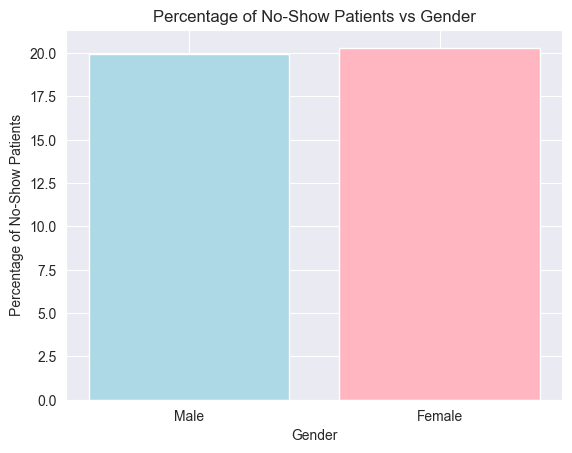

In [17]:
# Defining variables for plotting
locs = [1,2]
heights = [male_pct, female_pct]
labels = ['Male', 'Female']

# Plotting the bar chart
sns.set_style("darkgrid")
plt.bar(locs, heights, tick_label=labels, color=['lightblue', 'lightpink']);
plt.xlabel('Gender');
plt.ylabel('Percentage of No-Show Patients');
plt.title('Percentage of No-Show Patients vs Gender');

It can be concluded that there is practically no difference between the percentage of patients that miss their appointments based on gender. Approx. 20% of both genders miss their appointments. There is no gender-specific correlation that can be observed.

### Research Question 3  - Do no-show patients have more diagnosed conditions than patients that do show up?
<br>Below is the proccess of the creation of the plot that will answer this question.

In [18]:
# Dropping unnecessary columns
df_n = df.drop(['gender', 'age'], axis=1)

In [19]:
# Creating functions to help with repetitiveness
def group_specific(df, group, spec):
    # makes the process of getting specific grouping faster.
    # takes in three args: df, group and spec
    # outputs ans.
    ans = df.groupby(group)[spec].value_counts()
    return ans

def percent_prop(df, main, ref):
    # makes the process of getting a percentage of the total proportion faster.
    # takes in three args: df, main and ref.
    # outputs ans.
    ans = (df[main] / (df[main] + df[ref])) * 100
    return ans

In [20]:
# Grouping data individually
df_hyp = group_specific(df_n,'no_show','hypertension')
df_hypF = percent_prop(df_hyp, 3, 2) # final value for percentage of hypertension-positive no-show patients
df_db = group_specific(df_n,'no_show','diabetes')
df_dbF = percent_prop(df_db, 3, 2) # final value for percentage of diabetes-positive no-show patients
df_al = group_specific(df_n,'no_show','alcoholism')
df_alF = percent_prop(df_al, 3, 2) # final value for percentage of alcoholism-positive no-show patients
df_hd = group_specific(df_n,'no_show','handcap')
df_hdF = percent_prop(df_hd, 3, 2) # final value for percentage of disabled no-show patients

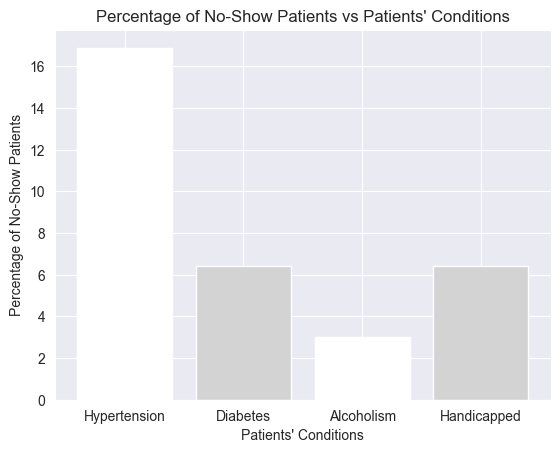

In [21]:
# Defining variables for plotting
locs = [1,2,3,4]
heights = [df_hypF, df_dbF, df_alF, df_hdF]
labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicapped']

# Plotting the bar chart
sns.set_style("darkgrid")
plt.bar(locs, heights, tick_label=labels, color=['white', 'lightgrey']);
plt.xlabel('Patients\' Conditions');
plt.ylabel('Percentage of No-Show Patients');
plt.title('Percentage of No-Show Patients vs Patients\' Conditions');

A few things can be concluded from the chart above.
- Patients with Hypertension end up missing their appointments more frequently than all of the other three conditions, combined.
- Patients with Diabetes as well as Handcapped patients do not frequently miss their appointments.
- Patients with alcoholism have the lowest no-show rate out of the other conditions.

<br>In general, it can be concluded that patients with one of the aforementioned conditions tend to attend their appointments.

<a id='conclusions'></a>
## Conclusions
### Findings
The following are the general findings of this report.
- Younger people tend to miss their appointments more than older people.
- There is no gender-specific correlation with pateints missing their appointments.
- Patients with Diabetes, Alcoholism or that are handicapped attend their appointments more often than the general public.
- Patients with Hyptertension attend their appointments at a slightly lower rate than the general public.
### Limitations
The first limitation was that this data was gathered within one country, so a true conclusion can not be reached as the results could be influenced by national matters. 
<br>Secondly, there was not enough data on the patients' conditions. There are many other conditions like Heart Disease, Cancer, etc that would allow for a more acurate conclusion.
<br>Moreover, this dataset doesn't give the option for different types of charts to be used as mostly all of the values are either 0 or 1.
<br>Finally, this data was gathered 7 years ago. Having a more recent dataset would help convey the current state of the people better and the conclusion would be more relevant.